# CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Direktori dataset
train_dir = '/content/drive/MyDrive/CNN/augmentation_split/train'
test_dir = '/content/drive/MyDrive/CNN/augmentation_split/validation'

In [ ]:
# Memuat dataset menggunakan image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Ukuran gambar yang diinginkan
    batch_size=32,  # Ukuran batch
    label_mode='binary',  # Karena kita klasifikasi biner
    shuffle=True  # Mengacak data agar model tidak bias
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  # Ukuran gambar yang diinginkan
    batch_size=32,  # Ukuran batch
    label_mode='binary',  # Karena kita klasifikasi biner
    shuffle=False  # Tidak perlu shuffle untuk validasi
)

Found 2002 files belonging to 2 classes.
Found 502 files belonging to 2 classes.


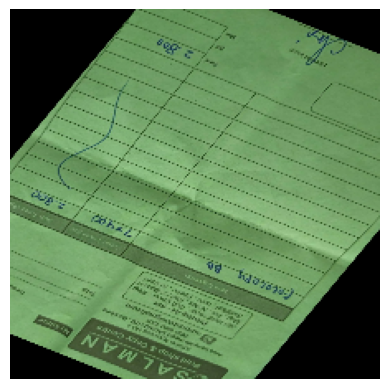

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the _PrefetchDataset to an iterator
train_dataset_iterator = iter(train_dataset)

plt.figure()
x_train, y_train = next(train_dataset_iterator)  # Use the iterator here

# Pilih gambar secara acak
image = x_train[np.random.choice(range(x_train.shape[0]))]

# Convert EagerTensor to numpy array before plotting
image = image.numpy()  # Mengonversi tensor ke array NumPy

plt.imshow(image.astype("uint8"))  # Menggunakan .astype setelah konversi ke NumPy
plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    # Input layer dengan normalisasi gambar
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1.0 / 255),  # Normalisasi gambar ke range [0, 1]

    # Lapisan konvolusi dan pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten untuk melanjutkan ke lapisan fully connected
    tf.keras.layers.Flatten(),

    # Fully connected layer dengan regularisasi L2
    #tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),

    # Dropout layer untuk mengurangi overfitting
    tf.keras.layers.Dropout(0.5),  # Mematikan 50% neuron di lapisan ini

    # Output layer untuk 2 kelas: valid dan rotate
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
# Menyusun model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Pengaturan learning rate
    loss='binary_crossentropy',  # Loss function untuk klasifikasi biner
    metrics=['accuracy']  # Mengukur akurasi
)
# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      23,888,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,641 (91.20 MB)

 Trainable params: 23,908,641 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melatih model
history = model.fit(
    train_dataset,
    epochs=20,  # Jumlah epoch untuk pelatihan
    validation_data=validation_dataset  # Validasi model menggunakan validation_dataset
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 679s 11s/step - accuracy: 0.6686 - loss: 3.3567 - val_accuracy: 0.8426 - val_loss: 0.7261
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 604ms/step - accuracy: 0.8174 - loss: 0.7016 - val_accuracy: 0.8486 - val_loss: 0.5011
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.8437 - loss: 0.5000 - val_accuracy: 0.8506 - val_loss: 0.4422
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 542ms/step - accuracy: 0.8464 - loss: 0.4942 - val_accuracy: 0.8506 - val_loss: 0.4433
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 610ms/step - accuracy: 0.8511 - loss: 0.4763 - val_accuracy: 0.8526 - val_loss: 0.4538
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 587ms/step - accuracy: 0.8520 - loss: 0.4740 - val_accuracy: 0.8586 - val_loss: 0.4296
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.8440 - loss: 0.4769 - val_accuracy: 0.8486 - val_loss: 0.4443
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 609ms/step - accuracy: 0.8552 - loss: 0.4420 - val_accur

In [ ]:
# Menyimpan model setelah pelatihan
model.save('/content/drive/MyDrive/CNN/model_cnn_valid_rotate_fix.h5')

In [ ]:
# Mengevaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - accuracy: 0.8101 - loss: 0.4439
Test Accuracy: 0.8665338754653931
Test Loss: 0.42020002007484436


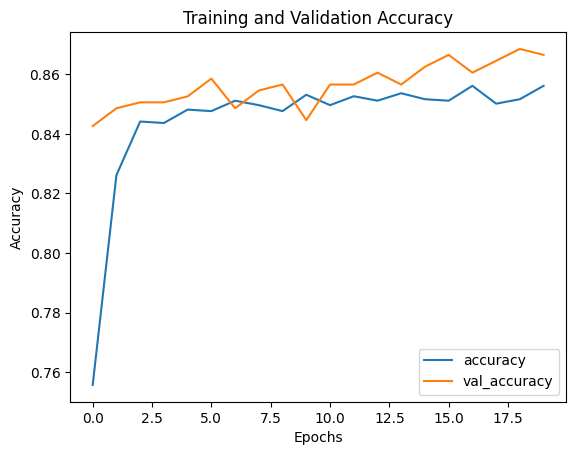

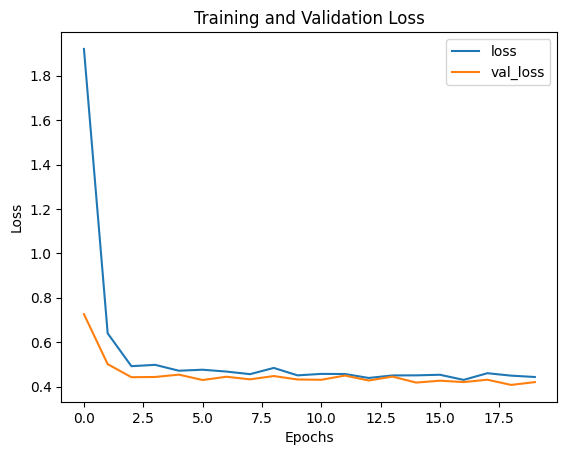

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot kehilangan pelatihan dan validasi
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Found 502 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 603ms/step


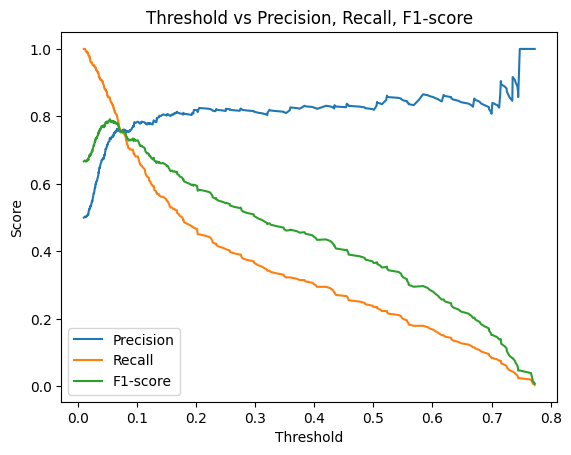

Optimal threshold: 0.054486848413944244


In [ ]:
#Mencari Optimal Threshold
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


# Memuat model yang sudah dilatih (sesuaikan dengan path model Anda)
model = load_model('/content/drive/MyDrive/CNN/model_cnn_valid_rotate_fix.h5')  # Gantilah dengan path model Anda

# Definisikan ImageDataGenerator untuk memuat dataset validasi
datagen = ImageDataGenerator(rescale=1./255)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/CNN/augmentation_split/validation',
    target_size=(224, 224),  # Sesuaikan dengan ukuran input model
    batch_size=32,
    class_mode='binary',  # Pastikan ini sesuai dengan jenis klasifikasi (binary)
    shuffle=False)  # Agar urutan prediksi dan label tetap sesuai

# Mendapatkan label sebenarnya (y_true)
y_true = validation_generator.classes  # Ini adalah label asli dari dataset

# Mendapatkan prediksi probabilitas
predictions = model.predict(validation_generator, verbose=1)

# Menghitung precision, recall, dan thresholds
precision, recall, thresholds = precision_recall_curve(y_true, predictions)

# Menghitung F1-score untuk setiap threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Threshold vs Precision, Recall, F1-score')
plt.show()

# Cari threshold dengan F1-score terbaik
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Optimal threshold: {best_threshold}')


In [ ]:
#Mengecek gambar rotate/tidak (1 gambar)
def predict_image_with_prob(img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = (predictions < 0.0544).astype("int32")

    print(f"Prediction Probability: {predictions[0][0]:.4f}")
    if predicted_class == 0:
        print(f"The image is classified as 'Valid'.")
    else:
        print(f"The image is classified as 'Rotate'.")

# Coba dengan gambar tertentu
predict_image_with_prob('/content/drive/MyDrive/CNN/Testing/valid 3.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Probability: 0.3798
The image is classified as 'Rotate'.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Memuat model yang telah disimpan
model = tf.keras.models.load_model('/content/drive/MyDrive/CNN/model_cnn_valid_rotate_fix.h5')

# Fungsi untuk memuat dan memproses gambar baru
def load_and_preprocess_image(img_path):
    # Memuat gambar dan mengubah ukurannya sesuai dengan ukuran input model
    img = image.load_img(img_path, target_size=(224, 224))

    # Mengubah gambar menjadi array
    img_array = image.img_to_array(img)

    # Menambahkan dimensi batch
    img_array = np.expand_dims(img_array, axis=0)

    # Normalisasi gambar ke rentang [0, 1]
    img_array = img_array / 255.0

    return img_array

# Fungsi untuk melakukan prediksi
def predict_image_class(img_path):
    img_array = load_and_preprocess_image(img_path)

    # Melakukan prediksi
    predictions = model.predict(img_array)

    # Mengonversi probabilitas ke kelas (0: valid, 1: rotated)
    predicted_class = (predictions < 0.0544).astype("int32")

    # Menampilkan hasil prediksi
    if predicted_class == 0:
        print(f"The image is classified as 'Valid'.")
    else:
        print(f"The image is classified as 'Rotate'.")
    print(predictions)

# Path ke gambar yang ingin diuji
#img_path = '/content/drive/MyDrive/CNN/Testing/rotate 2.jpg'  # Ganti dengan path gambar Anda yang ingin diuji

# Melakukan prediksi
#predict_image_class(img_path)


Testing image: Copy of rotate 22.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


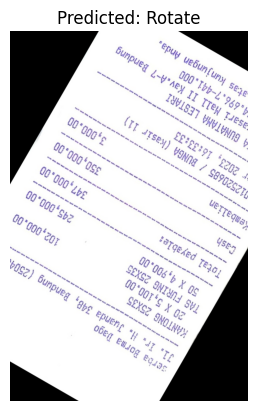

Predicted class: Rotate (Probability: 0.0498)
Testing image: Copy of rotate 18.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


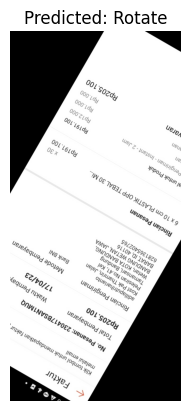

Predicted class: Rotate (Probability: 0.0339)
Testing image: Copy of rotate 14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


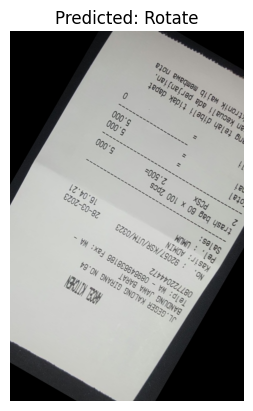

Predicted class: Rotate (Probability: 0.0194)
Testing image: Copy of rotate 12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


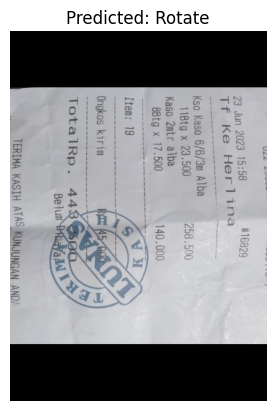

Predicted class: Rotate (Probability: 0.0301)
Testing image: Copy of rotate 9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


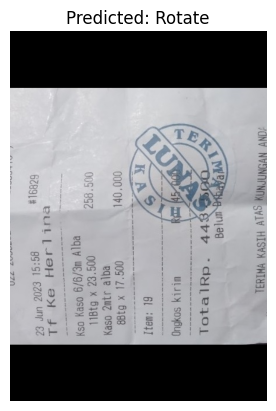

Predicted class: Rotate (Probability: 0.0401)
Testing image: Copy of rotate 3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


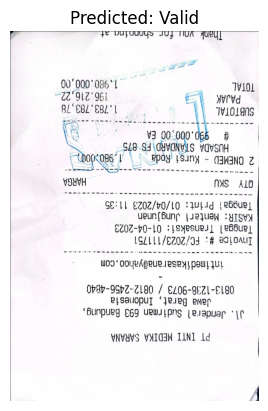

Predicted class: Valid (Probability: 0.7350)
Testing image: Copy of valid 45.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


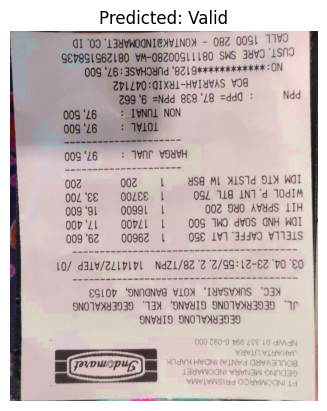

Predicted class: Valid (Probability: 0.2980)
Testing image: Copy of valid 42.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


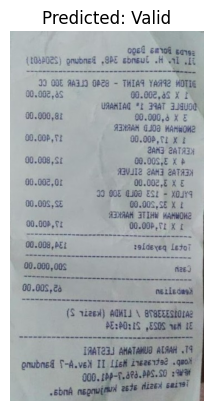

Predicted class: Valid (Probability: 0.2767)
Testing image: Copy of valid 34.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


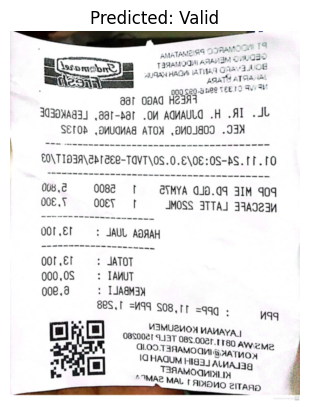

Predicted class: Valid (Probability: 0.5119)
Testing image: Copy of valid 24.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


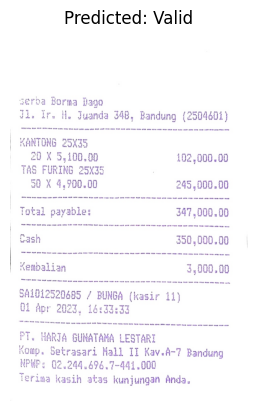

Predicted class: Valid (Probability: 0.7689)
Testing image: Copy of valid 14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


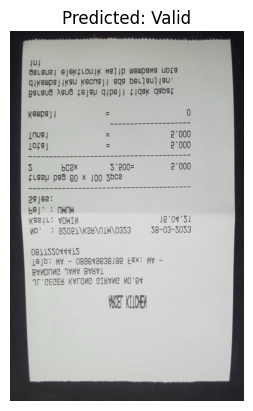

Predicted class: Valid (Probability: 0.1207)
Testing image: Copy of valid 11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


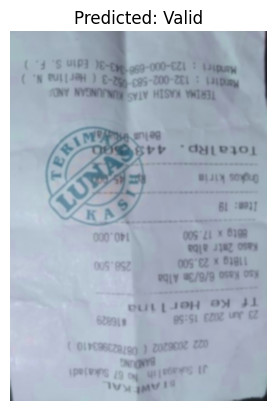

Predicted class: Valid (Probability: 0.3018)


In [ ]:
#Mengecek gambar dengan outputnya ada gambar

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Fungsi untuk memuat gambar dan mempersiapkan input untuk model
def prepare_image(img_path, target_size=(224, 224)):
    # Memuat gambar dengan ukuran yang sesuai dengan model
    img = image.load_img(img_path, target_size=target_size)

    # Mengubah gambar menjadi array dan menambahkan dimensi batch
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

    # Normalisasi gambar ke range [0, 1] sesuai dengan model
    img_array = img_array / 255.0
    return img_array

# Fungsi untuk menguji gambar dan menampilkan hasil prediksi
def test_model(model, img_path):
    # Menyiapkan gambar
    img_array = prepare_image(img_path)

    # Melakukan prediksi
    predictions = model.predict(img_array)

    # Menentukan kelas berdasarkan output sigmoid
    predicted_class = 'Rotate' if predictions[0] < 0.0544 else 'Valid'

    # Menampilkan gambar dan hasil prediksi
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

    # Menampilkan prediksi dalam console
    print(f"Predicted class: {predicted_class} (Probability: {predictions[0][0]:.4f})")

# Menguji semua gambar dalam folder
test_folder = '/content/drive/MyDrive/CNN/Testing/testing2'  # Ganti dengan folder yang berisi gambar-gambar untuk diuji

# Daftar file gambar dalam folder
test_images = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Uji setiap gambar dalam folder
for img_filename in test_images:
    img_path = os.path.join(test_folder, img_filename)
    print(f"Testing image: {img_filename}")
    test_model(model, img_path)


In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 784.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully u

In [ ]:
import tensorflow as tf
import tensorflowjs as tfjs

# Step 1: Load the saved model from the .h5 file
model_path = './rotation.h5'
model = tf.keras.models.load_model(model_path)

# Step 2: Save the model in TensorFlow.js format
tfjs_target_dir = '/content/drive/MyDrive/CNN/tfjs_model_rotation'
tfjs.converters.save_keras_model(model, tfjs_target_dir)

print(f"Model saved in TensorFlow.js format at {tfjs_target_dir}")


failed to lookup keras version from the file,
    this is likely a weight only file
Model saved in TensorFlow.js format at /content/drive/MyDrive/CNN/tfjs_model_rotation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install h5py


In [ ]:
from tensorflow.keras.models import load_model

# Memuat model dari file .h5
model = load_model('/content/drive/MyDrive/CNN/model_cnn_valid_rotate_fix.h5')

# Mengonversi model ke format JSON
model_json = model.to_json()

# Menyimpan model dalam format JSON
with open('model.json', 'w') as json_file:
    json_file.write(model_json)


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Memuat model dari file .h5
model = load_model('/content/drive/MyDrive/CNN/model_cnn_valid_rotate_fix.h5')

# Menyusun model (compile) jika Anda ingin melanjutkan pelatihan atau evaluasi
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Mengonversi model ke format JSON
model_json = model.to_json()

# Menyimpan model dalam format JSON
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
